# Práctica 5: Análisis frecuencial de señales
*   FEDERICO OCAMPO QUICENO
*   DANIEL PALACIO ALVAREZ
*   ALEJANDRO AGUDELO TAMAYO

In [2]:
import zipfile
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from google.colab import drive
from scipy.signal import welch, get_window, find_peaks
from scipy.fft import fft, ifft
from google.colab import drive
from scipy.signal import welch as pwelch
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Representación de señales

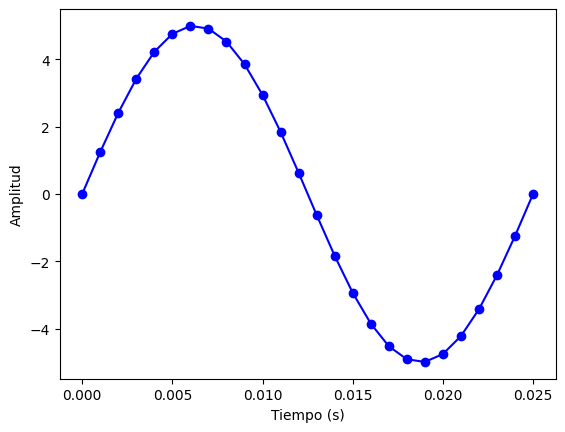

In [ ]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o', color='b')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

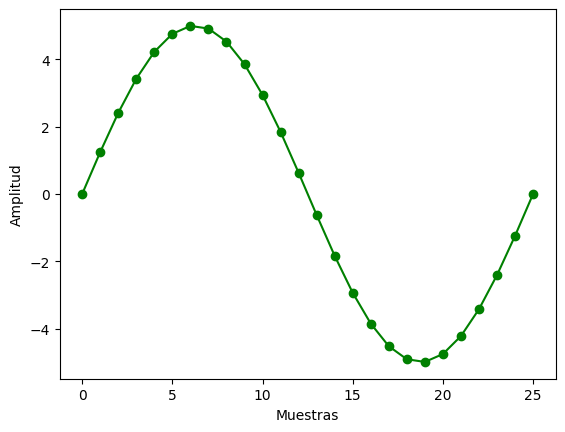

In [ ]:
fo = Fo / Fs  # Frecuencia normalizada (frecuencia de la señal sobre frecuencia de muestreo)
n = np.arange(0, len(t))  # Vector de muestras (desde 0 hasta el largo de t)
x1 = A * np.sin(2 * np.pi * fo * n)  # Señal senoidal en función del número de muestras
plt.plot(n, x1, marker='o', color='g')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()  # Mostramos la gráfica


In [ ]:
# Comparar las primeras 5 muestras de ambas señales
first_5_x = x[:5]
first_5_x1 = x1[:5]

# Verificar si las muestras son iguales
if np.array_equal(first_5_x, first_5_x1):
    print("Las primeras 5 muestras de ambas señales son iguales.")
else:
    print("Las primeras 5 muestras de ambas señales son diferentes.")

print("Primeras 5 muestras de la señal con eje x en tiempo:", first_5_x)
print("Primeras 5 muestras de la señal con eje x en muestras:", first_5_x1)

Las primeras 5 muestras de ambas señales son iguales.
Primeras 5 muestras de la señal con eje x en tiempo: [0.         1.24344944 2.40876837 3.42273553 4.22163963]
Primeras 5 muestras de la señal con eje x en muestras: [0.         1.24344944 2.40876837 3.42273553 4.22163963]


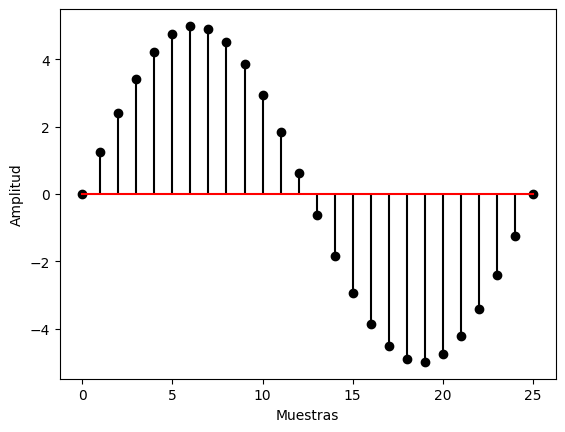

In [ ]:
plt.stem(n, x1, linefmt='black', markerfmt='o', basefmt='r')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

### 2. Energía y potencia en el dominio del tiempo

In [ ]:
## Calcular energía, potencia y RMS para 10 ciclos discreta
t1 = np.arange(0, 10*Tp+T, T)
x1 = A * np.sin(2 * np.pi * Fo * t1)

# Calcular energía, potencia y RMS para 10 ciclos
energia10_1 = sum(x1**2)
potencia10_1 = energia10_1 / (len(t1) - 1)
rms10_1 = np.sqrt(potencia10_1)

print(f"Energía de un ciclo: {energia10_1}")
print(f"Potencia de un ciclo: {potencia10_1}")
print(f"RMS de un ciclo: {rms10_1}")

Energía de un ciclo: 3125.0000000000014
Potencia de un ciclo: 12.500000000000005
RMS de un ciclo: 3.535533905932738


In [ ]:
## Calcular energía, potencia y RMS para 10 ciclos continua
t10 = np.arange(0, 10 * Tp + T, T)
x10 = A * np.sin(2 * np.pi * Fo * t10)

# Calcular energía, potencia y RMS para 10 ciclos
energia10 = sum(x10**2)
potencia10 = energia10 / (len(t10) - 1)
rms10 = np.sqrt(potencia10)

print(f"Energía de 10 ciclos: {energia10}")
print(f"Potencia de 10 ciclos: {potencia10}")
print(f"RMS de 10 ciclos: {rms10}")

Energía de 10 ciclos: 3125.0000000000014
Potencia de 10 ciclos: 12.500000000000005
RMS de 10 ciclos: 3.535533905932738


### 3. Análisis de Fourier en tiempo discreto:

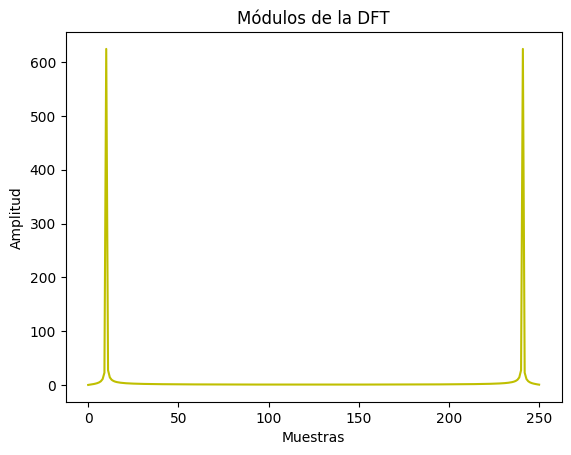

In [ ]:
X10 = np.fft.fft(x10)
plt.plot(abs(X10), color='y')
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

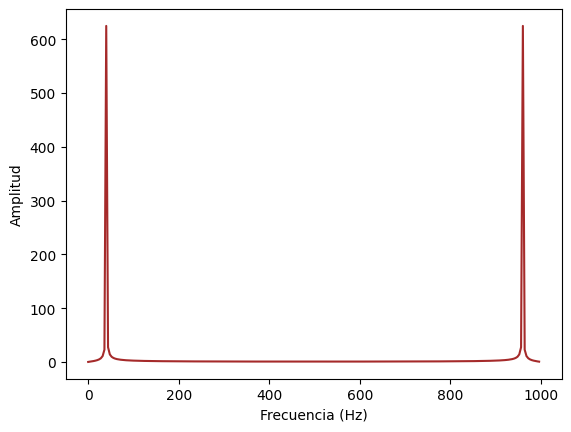

In [ ]:
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10), color='brown')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

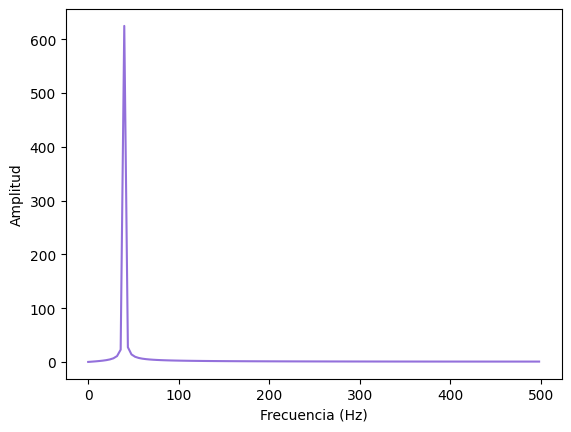

In [ ]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad), color='mediumpurple')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

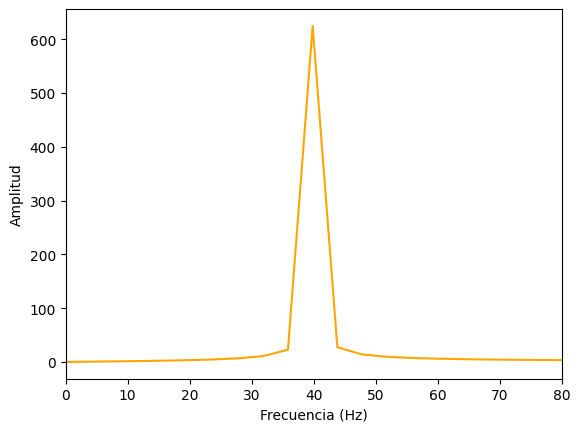

In [ ]:
plt.plot(Fmitad,abs(X10mitad), color='orange')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,80)
plt.show()

### 3.5. Periodogramas

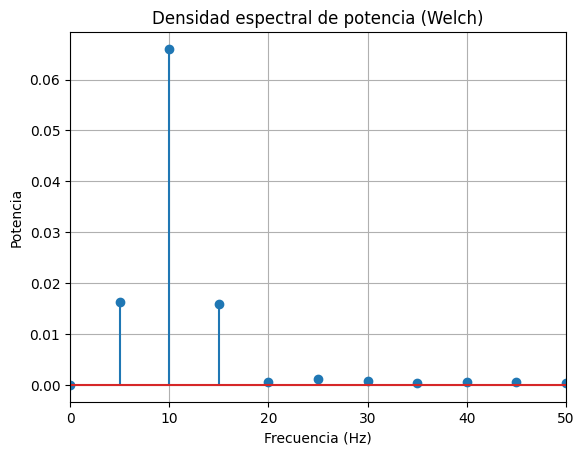

In [ ]:
# Generamos una señal de ejemplo (senoidal + ruido)
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs)
señal = np.array([np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))])

# Parámetros para el método de Welch
nperseg = 200  # Tamaño de la ventana
noverlap = int(nperseg / 2)  # Solapamiento

# Aplicamos Welch
f, Pxx = pwelch(señal[0, :], fs, window='hann', nperseg=nperseg, noverlap=noverlap)

# Graficamos frecuencia vs potencia
plt.stem(f, Pxx)  # ← sin 'use_line_collection'
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 50])
plt.title('Densidad espectral de potencia (Welch)')
plt.grid()
plt.show()



### 4. Aplicación

#### 4.1. Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente

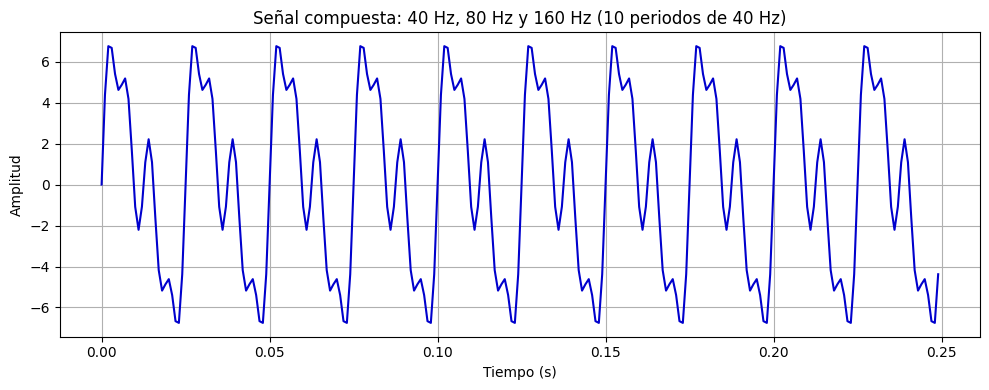

In [ ]:
# Definición de frecuencias de las tres señales sinusoidales
f1 = 40   # Frecuencia 1 en Hz
f2 = 80   # Frecuencia 2 en Hz
f3 = 160  # Frecuencia 3 en Hz

# Frecuencia de muestreo: debe ser mayor que 2*frec. máxima
Fs = 1000           # Frecuencia de muestreo en Hz
T = 1 / Fs          # Periodo de muestreo

# Tiempo total para representar 10 periodos de la señal de 40 Hz
Tp = 1 / f1                      # Periodo fundamental
t_total = 10 * Tp               # Duración total
t = np.arange(0, t_total, T)    # Vector de tiempo

# Composición de la señal
signal = (5 * np.sin(2 * np.pi * f1 * t) +
          3 * np.sin(2 * np.pi * f2 * t) +
          2 * np.sin(2 * np.pi * f3 * t))

# Graficar la señal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, color='mediumblue')  # Color de línea ajustado
plt.title('Señal compuesta: 40 Hz, 80 Hz y 160 Hz (10 periodos de 40 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()

# Guardar la imagen automáticamente
plt.savefig("punto_4_1_senal_compuesta.png", dpi=300)
plt.show()


#### 4.2. Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).

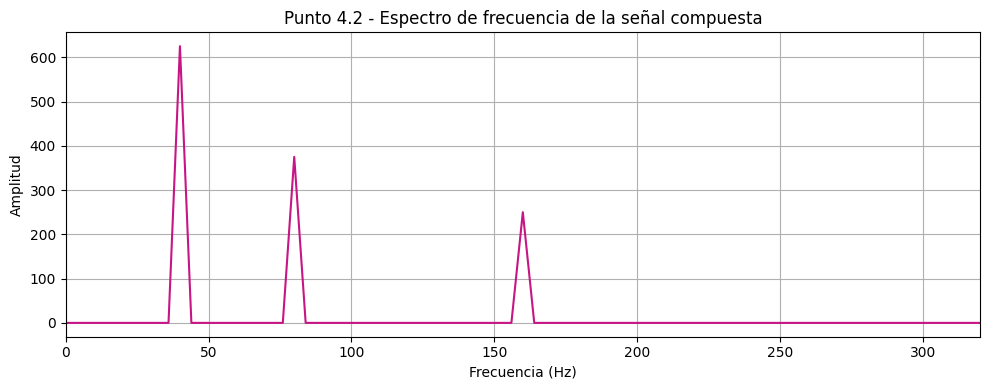

In [3]:
# Reutilizar los mismos parámetros del punto anterior
f1, f2, f3 = 40, 80, 160  # Frecuencias en Hz
Fs = 1000                 # Frecuencia de muestreo en Hz
T = 1 / Fs                # Periodo de muestreo
Tp = 1 / f1               # Periodo de la señal de 40 Hz
t_total = 10 * Tp         # Duración de 10 periodos
t = np.arange(0, t_total, T)  # Vector de tiempo

# Construir la señal compuesta con tres sinusoides
signal = (5 * np.sin(2 * np.pi * f1 * t) +
          3 * np.sin(2 * np.pi * f2 * t) +
          2 * np.sin(2 * np.pi * f3 * t))

# Calcular la DFT usando la FFT
N = len(signal)
X = np.fft.fft(signal)               # Transformada de Fourier
f = np.arange(0, N) * Fs / N         # Vector de frecuencias asociadas

# Graficar el espectro de magnitudes
plt.figure(figsize=(10, 4))
plt.plot(f, np.abs(X), color='mediumvioletred')  # Cambio de color
plt.title('Punto 4.2 - Espectro de frecuencia de la señal compuesta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 320)  # Mostrar hasta 320 Hz para enfocarse en lo importante
plt.grid(True)
plt.tight_layout()

# Guardar la imagen automáticamente
plt.savefig("punto_4_2_espectro_frecuencia.png", dpi=300)
plt.show()



Frecuencias encontradas en el espectro: [ 40.  80. 160.]


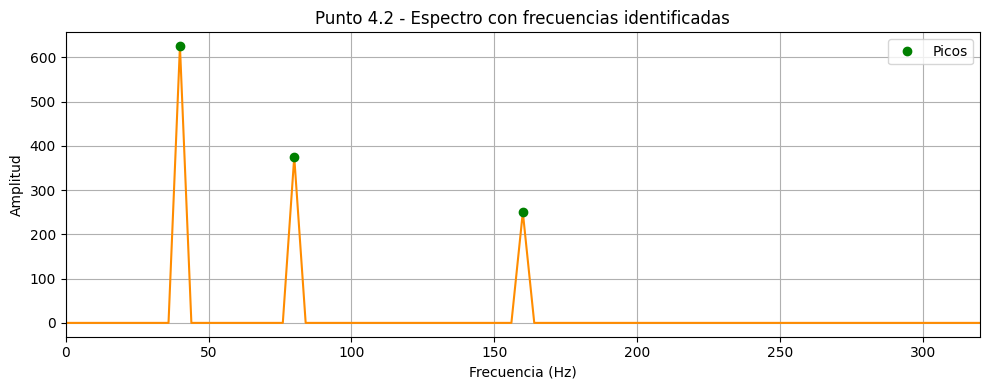

In [4]:
# Cortar la FFT a la mitad (frecuencia de Nyquist)
Nmitad = int(np.ceil(N / 2))
Fmitad = f[:Nmitad]
Xmitad = X[:Nmitad]

# Detectar los picos en el espectro (componentes dominantes)
peaks, _ = find_peaks(np.abs(Xmitad), height=100)  # Umbral de altura ajustable
frecuencias_picos = Fmitad[peaks]

# Imprimir las frecuencias encontradas
print("Frecuencias encontradas en el espectro:", frecuencias_picos)

# Graficar el espectro con los picos destacados
plt.figure(figsize=(10, 4))
plt.plot(Fmitad, np.abs(Xmitad), color='darkorange')  # Cambio de color de línea
plt.plot(Fmitad[peaks], np.abs(Xmitad)[peaks], 'go', label='Picos')  # Picos en verde
plt.title('Punto 4.2 - Espectro con frecuencias identificadas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 320)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Guardar la imagen automáticamente
plt.savefig("punto_4_2_espectro_con_picos.png", dpi=300)
plt.show()


#### 4.3. Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

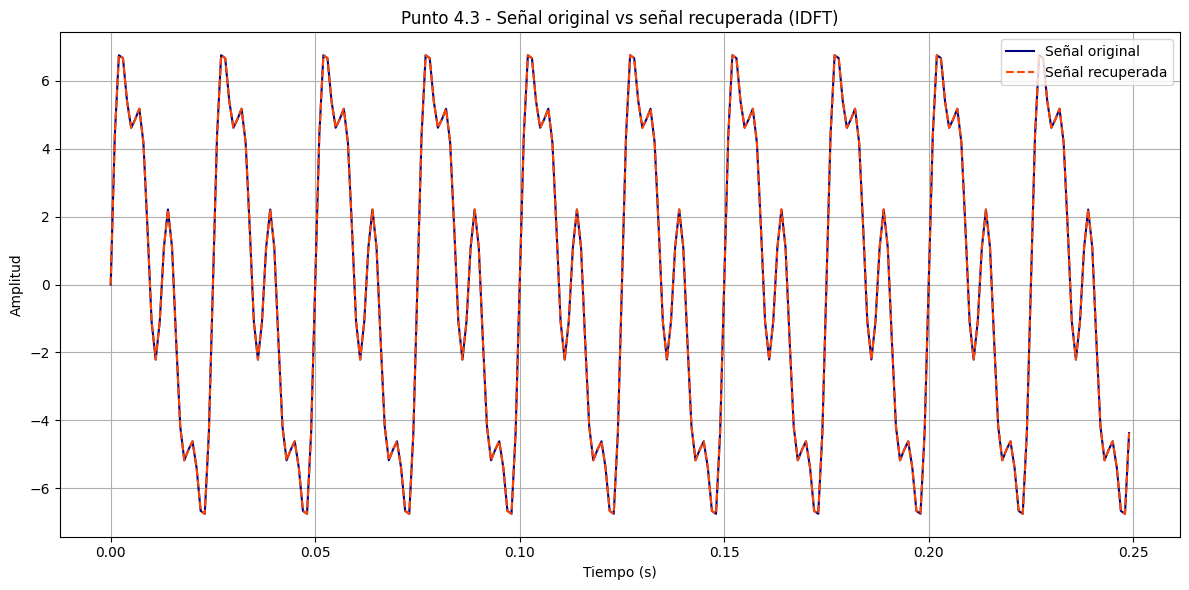

In [ ]:
# Calcular la Transformada Inversa de Fourier (IDFT)
signal_recuperada = np.fft.ifft(X)  # Inversa de la FFT

# Graficar señal original vs señal recuperada
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Señal original', color='navy')       # Línea continua
plt.plot(t, np.real(signal_recuperada), '--', label='Señal recuperada', color='orangered')  # Línea discontinua

plt.title('Punto 4.3 - Señal original vs señal recuperada (IDFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Guardar la imagen
plt.savefig("punto_4_3_idft.png", dpi=300)
plt.show()



#### 4. 4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?


```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```



### Extraiga de manera similar cada una de las componentes de la señal.

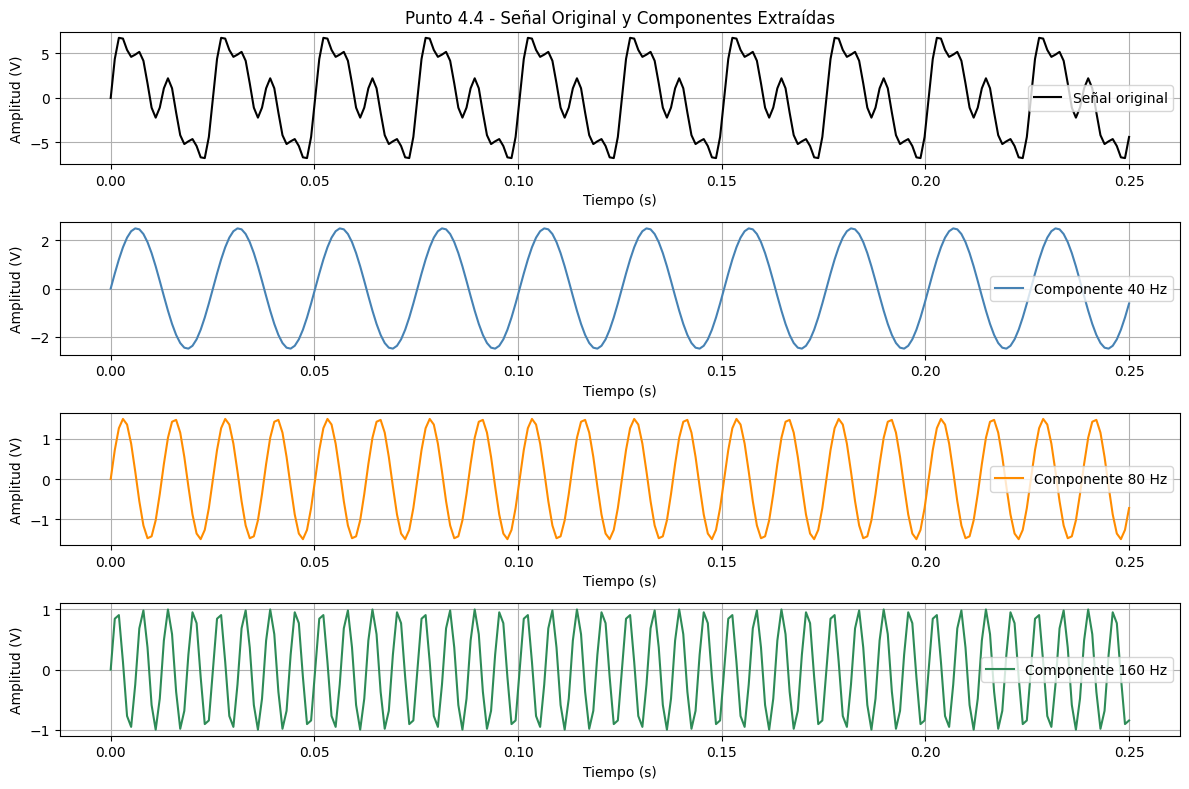

In [ ]:
# Aplicar la DFT a la señal original
F1 = np.fft.fft(signal)
t = np.linspace(0, len(signal)/Fs, len(signal))  # Recalcular vector de tiempo

# Función para extraer una componente específica del espectro
def filtrar_frecuencia(F1, indice_inicio, indice_fin):
    F2 = np.zeros(len(F1), dtype=complex)  # Crear vector complejo de ceros
    F2[indice_inicio:indice_fin] = F1[indice_inicio:indice_fin]  # Retener solo la banda deseada
    return np.fft.ifft(F2)  # Inversa para recuperar la señal

# Extraer componentes
xr_40 = filtrar_frecuencia(F1, 9, 13)
xr_80 = filtrar_frecuencia(F1, 19, 23)
xr_160 = filtrar_frecuencia(F1, 39, 43)

# Graficar la señal original y las componentes extraídas
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(t, signal, label='Señal original', color='black')
plt.title('Punto 4.4 - Señal Original y Componentes Extraídas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 40 Hz
plt.subplot(4, 1, 2)
plt.plot(t, np.real(xr_40), label='Componente 40 Hz', color='steelblue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 80 Hz
plt.subplot(4, 1, 3)
plt.plot(t, np.real(xr_80), label='Componente 80 Hz', color='darkorange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 160 Hz
plt.subplot(4, 1, 4)
plt.plot(t, np.real(xr_160), label='Componente 160 Hz', color='seagreen')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

plt.tight_layout()

# Guardar la figura
plt.savefig("punto_4_4_componentes_extraidas.png", dpi=300)
plt.show()


#### 4.5 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

In [ ]:
ruta = '/content/drive/MyDrive/Colab Notebooks/'
archivo_mat = os.path.join(ruta, 'senecg.mat')
datos = sio.loadmat(archivo_mat)

# Para ver qué variables tiene el archivo:
print("Variables en el archivo:", datos.keys())

ecg_signal = datos['ECG']
print("Forma de la señal ECG:", ecg_signal.shape)
print("Primeros valores:", ecg_signal[:10])

# Revisar la forma de la señal de ECG para entender su estructura
ecg_signal_shape = ecg_signal.shape

# Mostrar la forma de la señal
ecg_signal_shape

Variables en el archivo: dict_keys(['__header__', '__version__', '__globals__', 'ECG'])
Forma de la señal ECG: (1250, 1)
Primeros valores: [[ 0.16479384]
 [-0.00455636]
 [-0.23589197]
 [-0.083984  ]
 [ 0.16115376]
 [ 0.03975585]
 [-0.21464599]
 [-0.12484285]
 [ 0.14056194]
 [ 0.08944186]]


(1250, 1)

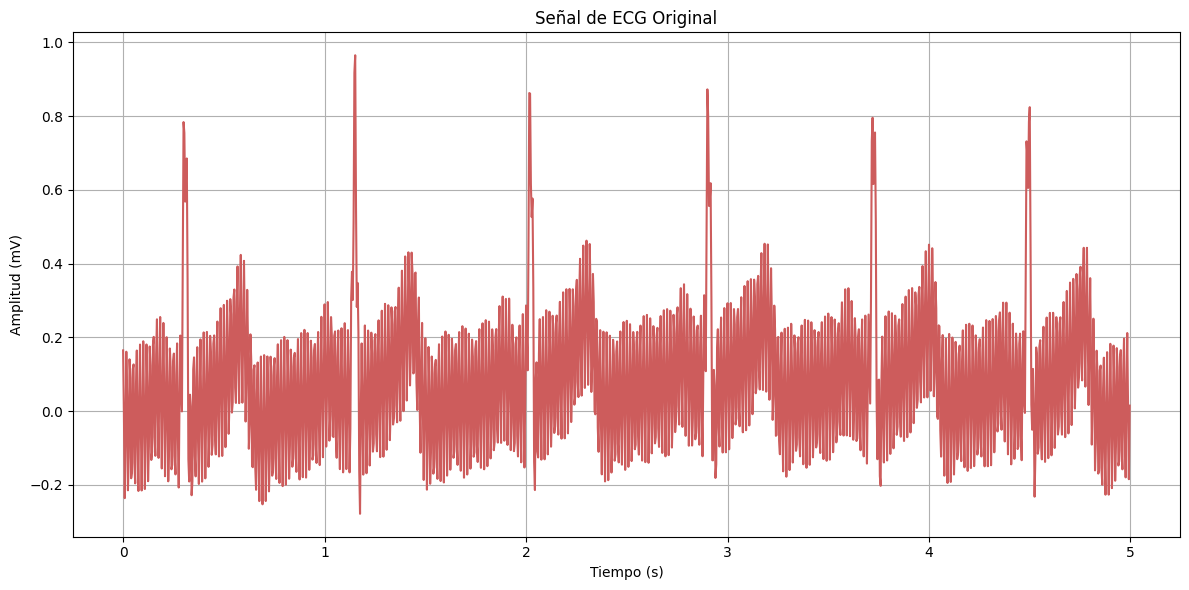

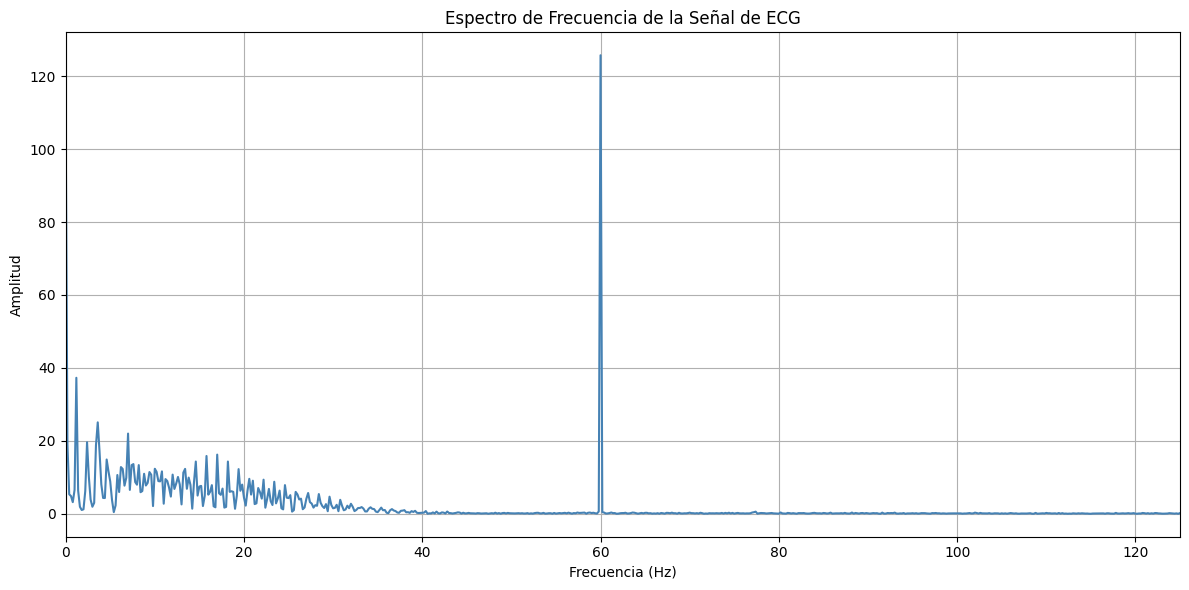

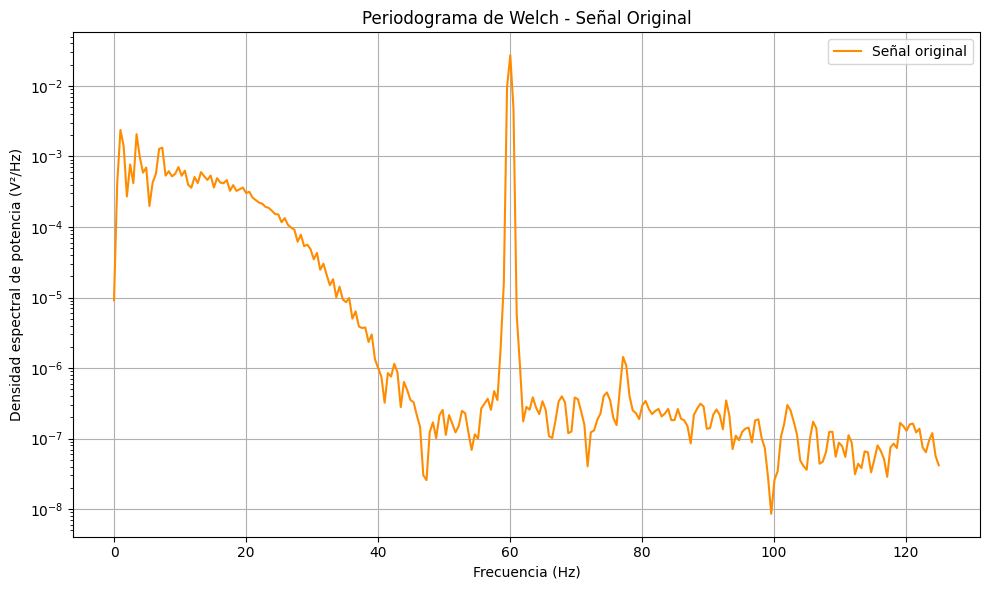

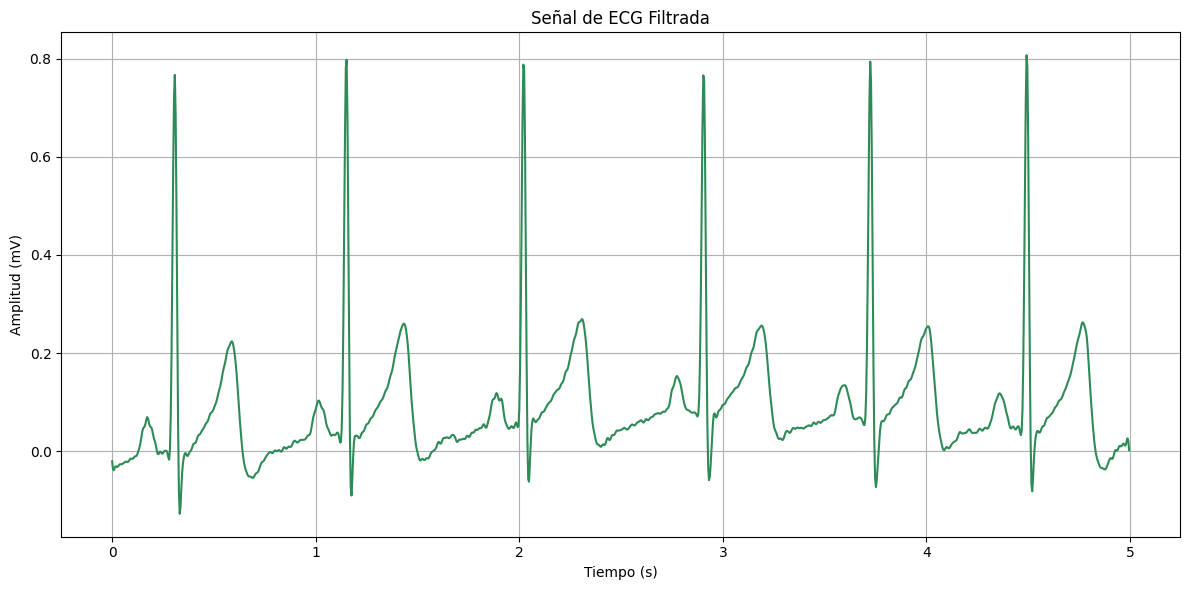

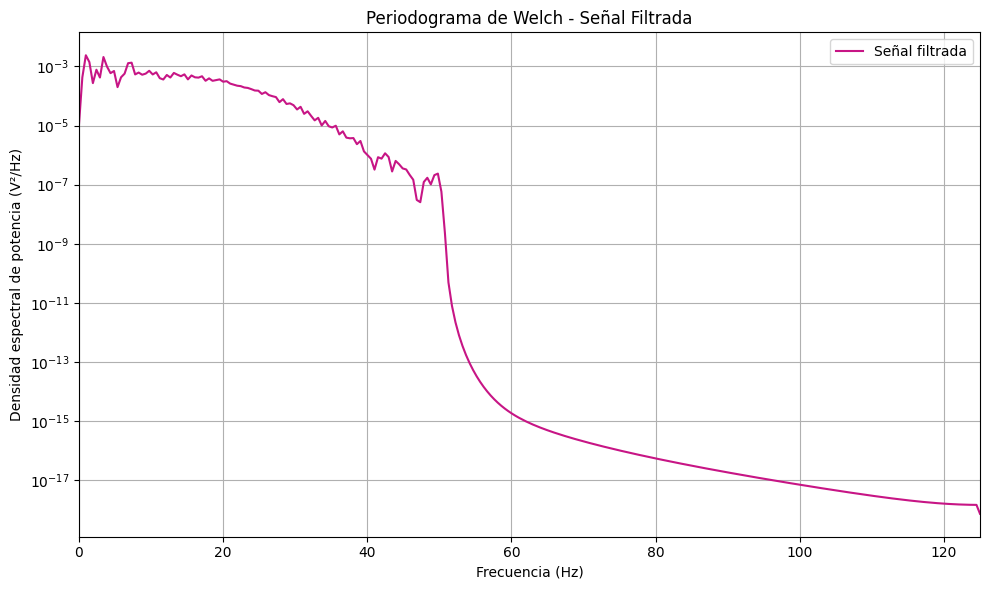

In [ ]:
ecg_signal = ecg_signal.flatten()

fs = 250  # Frecuencia de muestreo (Hz)
t = np.arange(0, len(ecg_signal) / fs, 1 / fs)  # Vector de tiempo

# -------------------- Gráfica de la señal original --------------------
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, color='indianred')
plt.title('Señal de ECG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.tight_layout()
plt.savefig("punto_4_5_1.png")


# -------------------- Espectro de frecuencia (DFT) --------------------
N = len(ecg_signal)
ecg_fft = np.fft.fft(ecg_signal)
f = np.arange(0, N) * fs / N

plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(ecg_fft), color='steelblue')
plt.title('Espectro de Frecuencia de la Señal de ECG')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 125)
plt.grid(True)
plt.tight_layout()
plt.savefig("punto_4_5_2.png")


# -------------------- Periodograma de Welch (original) --------------------
nperseg = 512
noverlap = nperseg // 2
window = get_window('hann', nperseg)

f_welch, Pxx = welch(ecg_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(10, 6))
plt.semilogy(f_welch, Pxx, label='Señal original', color='darkorange')
plt.title('Periodograma de Welch - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("punto_4_5_3.png")


# -------------------- Filtrado en frecuencia --------------------
frecuencias = np.fft.fftfreq(len(ecg_signal), d=1/fs)
fft_ecg = np.fft.fft(ecg_signal)

frecuencia_corte = 50
# Filtrar manteniendo componentes entre 0 y 50 Hz
indices = np.where((frecuencias >= 0) & (frecuencias <= frecuencia_corte))
fft_filtrada = np.zeros_like(fft_ecg, dtype=complex)
fft_filtrada[indices] = fft_ecg[indices]
# Reflejar componentes negativas
fft_filtrada[-len(indices[0]):] = fft_ecg[-len(indices[0]):]

# Reconstruir señal filtrada
ecg_filtrada = np.fft.ifft(fft_filtrada)

plt.figure(figsize=(12, 6))
plt.plot(t, np.real(ecg_filtrada), color='seagreen')
plt.title('Señal de ECG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.tight_layout()
plt.savefig("punto_4_5_4.png")


# -------------------- Periodograma de Welch (filtrada) --------------------
f_filt, Pxx_filt = welch(np.real(ecg_filtrada), fs, window='hann', nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(10, 6))
plt.semilogy(f_filt, Pxx_filt, label='Señal filtrada', color='mediumvioletred')
plt.title('Periodograma de Welch - Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.grid(True)
plt.xlim(0, 125)
plt.legend()
plt.tight_layout()
plt.savefig("punto_4_5_5.png")
plt.show()

#### 4.6 Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

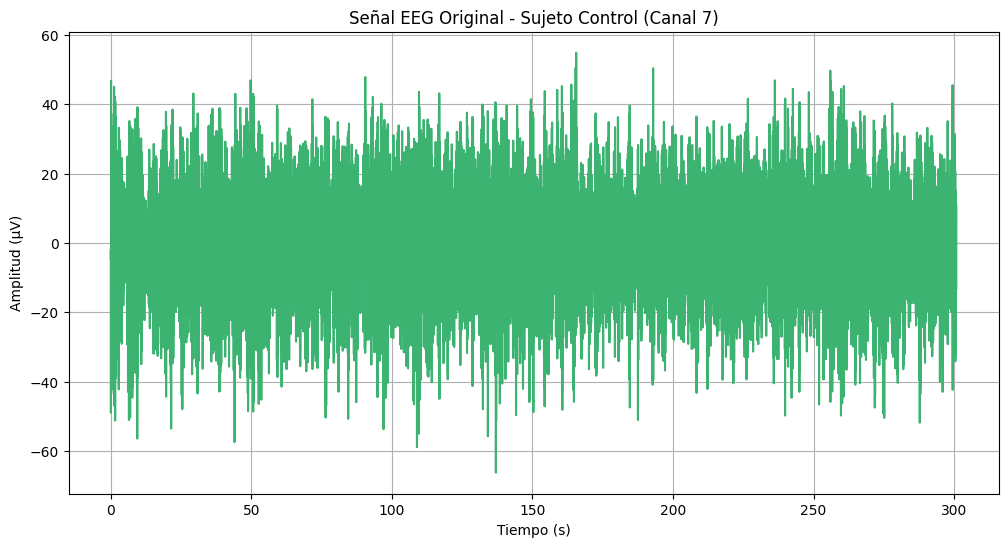

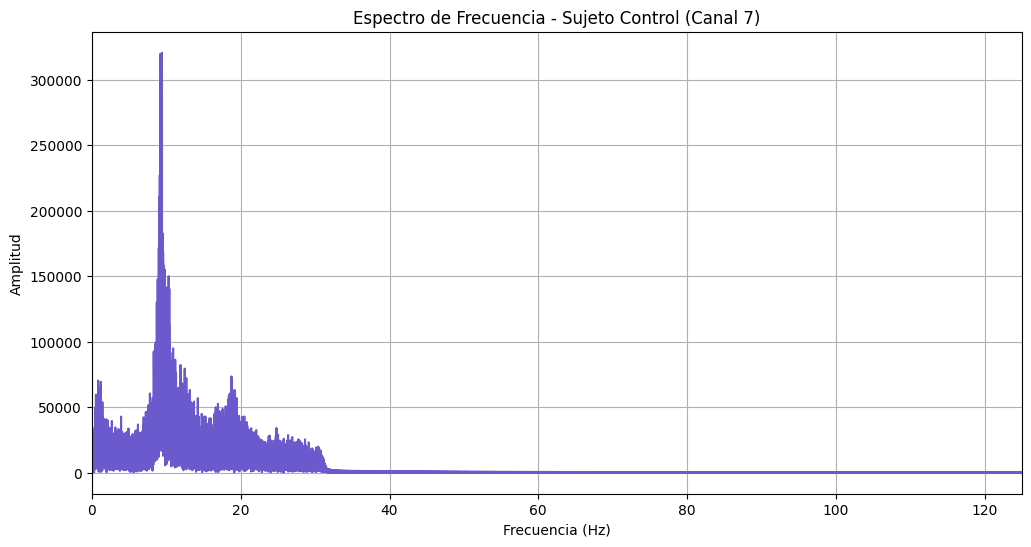

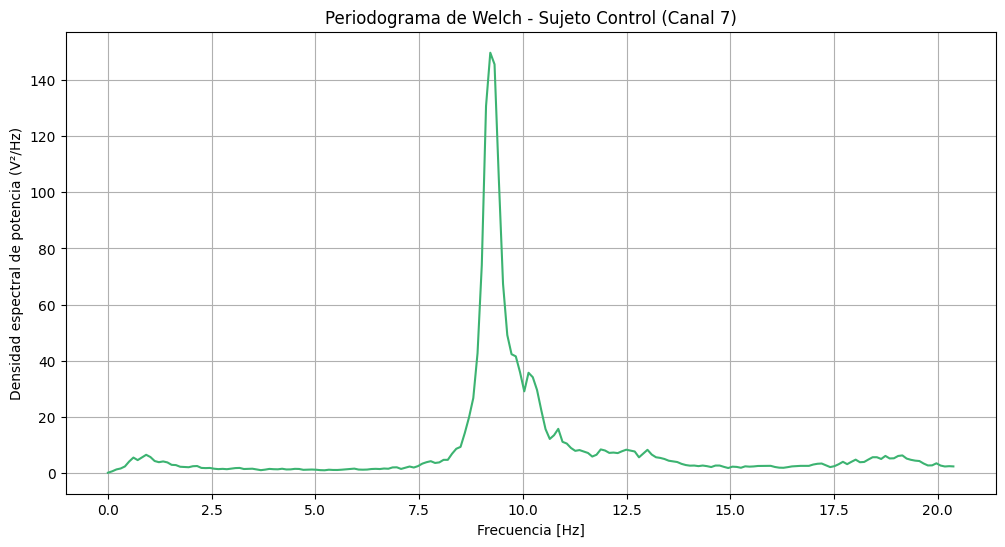

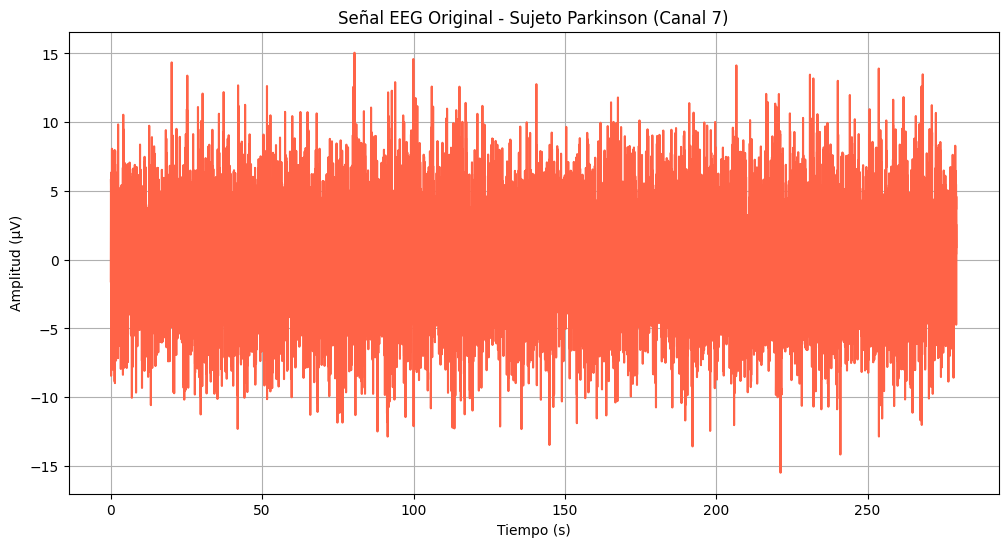

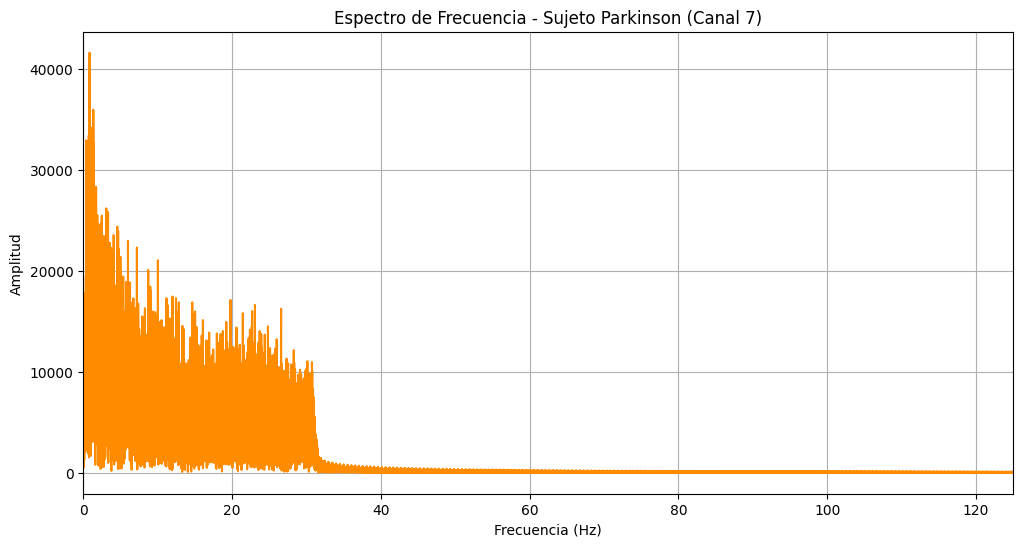

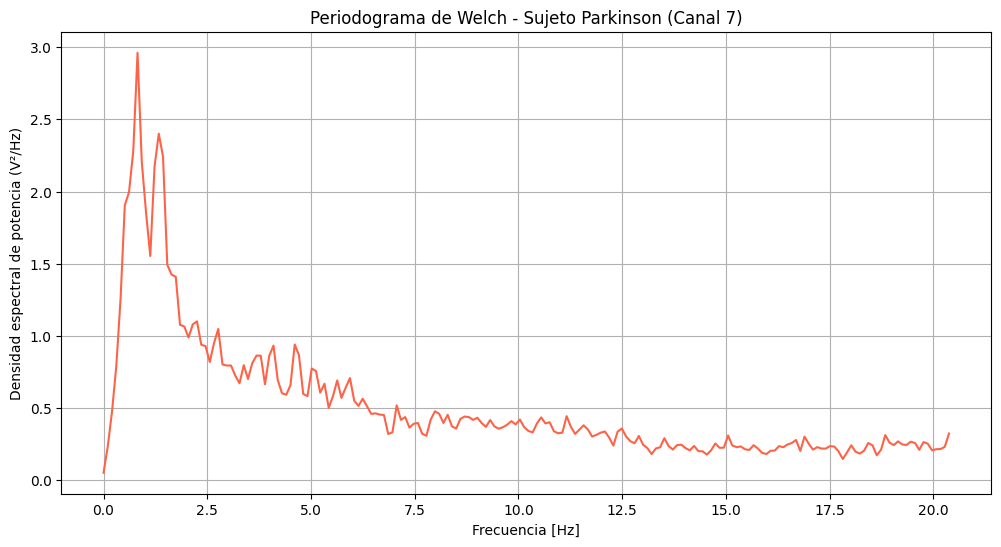

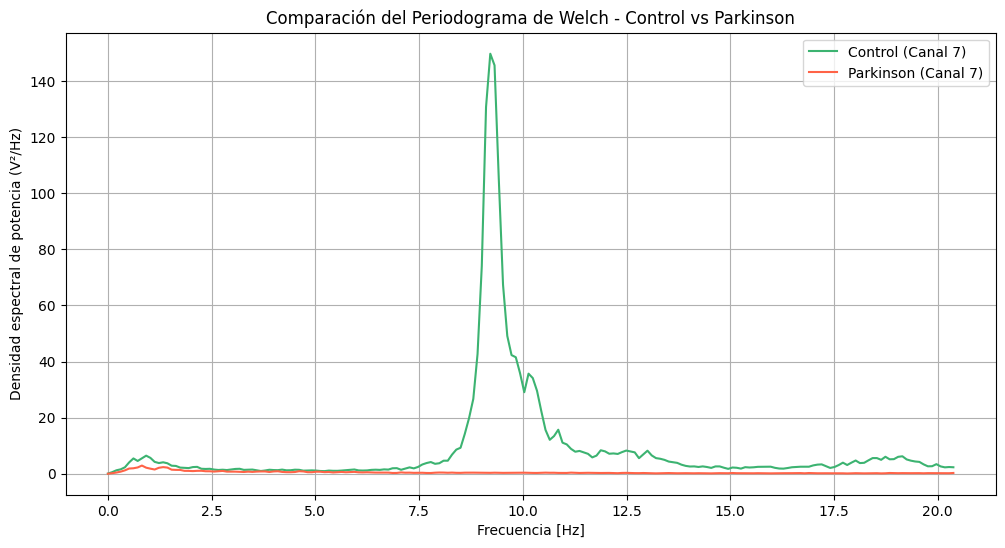

In [ ]:
# Ruta al archivo ZIP
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/datos_senales_datos_parkinson_cursos.zip'

# Directorio de extracción temporal
extract_path = '/content/extracted_data'
os.makedirs(extract_path, exist_ok=True)

# -------------------------------
# 2. Extraer contenido del ZIP
# -------------------------------
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# -------------------------------
# 3. Función para procesar sujeto
# -------------------------------
def procesar_sujeto(ruta_archivo, etiqueta, color_trama, color_fft, nombre_base):
    sujeto = sio.loadmat(ruta_archivo)
    data = sujeto['data']  # Dimensiones: (canales, muestras, ensayos)
    canal_7 = np.reshape(data, (data.shape[0], data.shape[1] * data.shape[2]), order='F')[7]

    fs = 1024  # Frecuencia de muestreo
    t = np.arange(0, len(canal_7) / fs, 1 / fs)

    # --- Gráfico de señal ---
    plt.figure(figsize=(12, 6))
    plt.plot(t, canal_7, color=color_trama)
    plt.title(f'Señal EEG Original - Sujeto {etiqueta} (Canal 7)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (µV)')
    plt.grid(True)
    plt.savefig(f'punto_4_6_1_{etiqueta.lower()}.png')
    plt.show()

    # --- Espectro de Fourier ---
    N = len(canal_7)
    eeg_fft = np.fft.fft(canal_7)
    f = np.arange(0, N) * fs / N

    plt.figure(figsize=(12, 6))
    plt.plot(f, np.abs(eeg_fft), color=color_fft)
    plt.title(f'Espectro de Frecuencia - Sujeto {etiqueta} (Canal 7)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.xlim(0, 125)  # Frecuencia de Nyquist
    plt.grid(True)
    plt.savefig(f'punto_4_6_2_{etiqueta.lower()}.png')
    plt.show()

    # --- Periodograma de Welch ---
    window_size = 10000
    overlap = window_size // 2
    ventana = get_window('hann', window_size)

    f_welch, pxx_welch = welch(
        canal_7,
        fs=fs,
        window=ventana,
        nperseg=window_size,
        noverlap=overlap
    )

    plt.figure(figsize=(12, 6))
    plt.plot(f_welch[:200], pxx_welch[:200], color=color_trama)
    plt.title(f'Periodograma de Welch - Sujeto {etiqueta} (Canal 7)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral de potencia (V²/Hz)')
    plt.grid(True)
    plt.savefig(f'punto_4_6_3_{etiqueta.lower()}.png')
    plt.show()

    return f_welch[:200], pxx_welch[:200]

# -------------------------------
# 4. Procesar Control
# -------------------------------
archivos_control = os.listdir(os.path.join(extract_path, 'control'))
ruta_control = os.path.join(extract_path, 'control', archivos_control[0])

f_control, pxx_control = procesar_sujeto(
    ruta_control,
    etiqueta='Control',
    color_trama='mediumseagreen',
    color_fft='slateblue',
    nombre_base='control'
)

# -------------------------------
# 5. Procesar Parkinson
# -------------------------------
archivos_parkinson = os.listdir(os.path.join(extract_path, 'parkinson'))
ruta_parkinson = os.path.join(extract_path, 'parkinson', archivos_parkinson[0])

f_parkinson, pxx_parkinson = procesar_sujeto(
    ruta_parkinson,
    etiqueta='Parkinson',
    color_trama='tomato',
    color_fft='darkorange',
    nombre_base='parkinson'
)

# -------------------------------
# 6. Comparación final Welch
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(f_control, pxx_control, label='Control (Canal 7)', color='mediumseagreen')
plt.plot(f_parkinson, pxx_parkinson, label='Parkinson (Canal 7)', color='tomato')
plt.title('Comparación del Periodograma de Welch - Control vs Parkinson')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.legend()
plt.grid(True)
plt.savefig('punto_4_6_4_comparacion.png')
plt.show()